In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona

First, we will use the neighborhood geojson file to show the border of each neighborhood and clean up the data, setting the neighborhood name as the index. This will be the reference for the plow map.

In [2]:
neighborhoods = gpd.read_file("neighborhoods.geojson",engine="pyogrio")
neighborhoods.columns = neighborhoods.columns.str.replace(" ","_")
neighborhoods['hood'] = neighborhoods['hood'].str.replace(" ","_")
neighborhoods['hood'] = neighborhoods['hood'].str.lower()
neighborhoods = neighborhoods.set_index('hood')

Define the findHood method

In [3]:
def findHood(point):
    
    temp = neighborhoods['geometry'].apply(lambda x: x.contains(point))
    if len(neighborhoods[temp].index) > 0:
        return neighborhoods[temp].index[0]
    else:
        return None
  

Loading in the snow plow datasets and combining them into one master dataframe

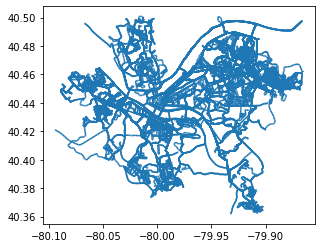

In [10]:
df1 = gpd.read_file("https://data.wprdc.org/dataset/d0b56030-3391-49db-87bd-4f1c16490fbc/resource/b6358664-d042-4f43-8518-fb3409f97bcc/download/2018-11-29_1149-2018-11-30_1149.geojson",engine="pyogrio")
df2 = gpd.read_file("https://data.wprdc.org/dataset/d0b56030-3391-49db-87bd-4f1c16490fbc/resource/5ed6cc26-0678-436d-ab2d-4c95107eb360/download/2018-12-04_1617-2018-12-06_0757.geojson",engine="pyogrio")
df3 = gpd.read_file("https://data.wprdc.org/dataset/d0b56030-3391-49db-87bd-4f1c16490fbc/resource/680866ab-4fea-463a-a1bb-db7b552e59b1/download/2018-12-06_1137-2018-12-07_0759.geojson",engine="pyogrio")

plow = pd.concat([df1,df2,df3])
plow.plot()


I used the explode function to break up any long LineString into smaller parts, so I could easily determine what neighborhood each line start was in.

In [11]:
plow2 = plow.explode()

Next, I iterated over each row in the exploded dataframe and found the centroid, the midpoint of the LineString, and used that as the reference for which neighborhood the LineString segment was in.

In [12]:
plow2['centroid'] = plow2['geometry'].centroid
plow2['hood'] = plow2['centroid'].apply(findHood)


<ipython-input-12-c4788d36057d>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plow2['centroid'] = plow2['geometry'].centroid


east_liberty         6693
highland_park        6541
perry_north          6244
elliott              5499
mount_washington     5334
                     ... 
arlington_heights      65
swisshelm_park         62
regent_square          33
east_carnegie          15
spring_garden           7
Name: hood, Length: 90, dtype: int64

In [14]:
plow_stat = plow2['hood'].value_counts()
print(plow_stat.to_string())

east_liberty                 6693
highland_park                6541
perry_north                  6244
elliott                      5499
mount_washington             5334
homewood_west                5174
squirrel_hill_south          5091
westwood                     5038
sheraden                     4546
hazelwood                    4482
carrick                      4398
larimer                      4325
perry_south                  3961
crafton_heights              3784
bloomfield                   3564
brookline                    3357
strip_district               3258
homewood_south               3215
lincoln_place                3193
stanton_heights              3093
west_end                     2928
homewood_north               2852
shadyside                    2816
marshall-shadeland           2789
east_hills                   2692
garfield                     2529
squirrel_hill_north          2491
overbrook                    2343
central_business_district    2286
south_side_slo

Above, we can see the neighborhoods with the most snow plowing is Squirrel Hill and East Liberty, while Beechview, Polish Hill, and North Oakland ranked last in amount of snow plowing.

# Shuo's Conclusion

After generating the whole 3 datasets' metric, I think Spring Hill is the best neighborhood because it hs the least fire zone and most snow plow. Although the land slide happened frequency is a little bit high but it is in an acceptable range.

# Nates Conclusion:
I think that East Liberty is the safest neighborhood since it has zero landslides, the most snow plowing, and a median fire zone score.

# Alok's Conclusion:
Based on the data, I think Spring Hill/Garden is the safest neighborhood as it has a frequency of 0 in fire zones, it significantly has the least amount of landslides (in terms of acres), and it is also very high in snowplow rate

# Final Conclusion:
After discussion, we agree with Sping Hill/Spring Garden are the top 2 neighborhood. After consideration, we agree with Spring Hill is the best neighborhood because Spring Garden is last in in plowing but Spring Hill is good base on the dataset.

<div style="width:480px"><iframe allow="fullscreen" frameBorder="0" height="270" src="https://giphy.com/embed/9zn5QnaEZuDlXtGAPZ/video" width="480"></iframe></div>

![](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExb3hqcGJ3d2E4a2Y0YXUyb3g3cHc5amp6b2N0cmZ5YnR1azJjMXZxbSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/26gsjCZpPolPr3sBy/giphy.gif)